# Upper Confidence Bound (UCB)

#### Multi-armed bandit problem

Imagine 5 slots machines all with a different distribution. How do you find out which one to play to maximise your returns (i.e. find most profitable distribution).

Modern application of this problem is advertising. How to find which advertisement is the best.

Example
- We have d arms. Arms are ads that we display to users when they connect to a web page

- Each time a user connects, that makes a round

- A each round n, we choose one ad to display to the user

- At each round n, ad i gives reward $r_i(n) \in \{0,1\}: r_i(n) = 1$ if the user clicked on the ad i, 0 if user didn't

- Goal is to maximise the total reward we get over many rounds

### UCB Algorithm

Step 1: At each round n, we consider two number for each ad i:
- $N_i(n)$ - the number of times the ad i was selected up to round n
- $R_i(n)$ - the sum of rewards of the ad i up to round n

Step 2: From these two number we compute:
- the average reward of ad i up to round n $$\bar{r}_i(n) = \frac{R_i(n)}{N_i(n)}$$

- the confidence interval $[\bar{r}_i(n)-\Delta{_i}(n),\bar{r}_i(n)+\Delta{_i}(n)]$ at round n with:

$$\Delta{_i}(n) = \sqrt{\frac{3log(n)}{2N_i(n)}}$$

Step 3: We select the ad i that has the maximum UCB $\bar{r}_i(n) + \Delta{_i}(n)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Ads_CTR_OPtimisation.csv')
#CTR is click through rate, want to maximise
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

In [5]:
sums_of_rewards

[120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]

In [6]:
total_reward

2178

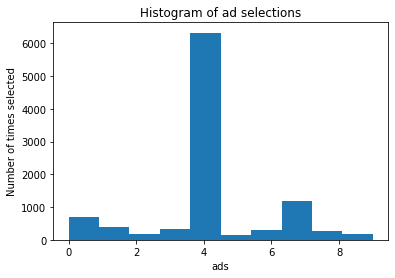

In [7]:
plt.hist(ads_selected)
plt.title('Histogram of ad selections')
plt.xlabel('ads')
plt.ylabel('Number of times selected');